In [20]:

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg

In [2]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/FYP/xray_recog/xray_dataset'
classes = os.listdir(path)
classes

['other', 'lung']

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 16)


other_dir = os.path.join('/content/drive/MyDrive/FYP/xray_recog/xray_dataset/other')
lung_dir = os.path.join('/content/drive/MyDrive/FYP/xray_recog/xray_dataset/lung')
other_names = os.listdir(other_dir)
lung_names = os.listdir(lung_dir)

pic_index = 210

other_images = [os.path.join(other_dir, fname) for fname in other_names[pic_index-8:pic_index]]
lung_images = [os.path.join(lung_dir, fname) for fname in lung_names[pic_index-8:pic_index]]

for i, img_path in enumerate(other_images + lung_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [37]:
# Define the rescaling layer
rescale = layers.Rescaling(1./255)

base_dir = '/content/drive/MyDrive/FYP/xray_recog/xray_dataset'

# Create datasets
train_datagen = image_dataset_from_directory(
    base_dir,
    image_size=(200, 200),
    subset='training',
    seed=1,
    validation_split=0.1,
    batch_size=32
)

# Apply normalization using the rescaling layer
train_datagen = train_datagen.map(lambda x, y: (rescale(x), y))

# Create the validation dataset with normalization
test_datagen = image_dataset_from_directory(
    base_dir,
    image_size=(200, 200),
    subset='validation',
    seed=1,
    validation_split=0.1,
    batch_size=32
)

# Apply normalization using the rescaling layer
test_datagen = test_datagen.map(lambda x, y: (rescale(x), y))

Found 1777 files belonging to 2 classes.
Using 1600 files for training.
Found 1777 files belonging to 2 classes.
Using 177 files for validation.


In [38]:
# Assuming input shape is (200, 200, 3) for 200x200 RGB images
input_shape = (200, 200, 3)

# Create a Sequential model
binary_classification_model = models.Sequential()

# Convolutional layers
binary_classification_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
binary_classification_model.add(layers.MaxPooling2D((2, 2)))
binary_classification_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
binary_classification_model.add(layers.MaxPooling2D((2, 2)))
binary_classification_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
binary_classification_model.add(layers.MaxPooling2D((2, 2)))

# Flatten before fully connected layers
binary_classification_model.add(layers.Flatten())

# Fully connected layers
binary_classification_model.add(layers.Dense(128, activation='relu'))
binary_classification_model.add(layers.Dropout(0.5))  # Dropout for regularization
binary_classification_model.add(layers.Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
binary_classification_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Display the model summary
binary_classification_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 99, 99, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 23, 23, 128)      

In [ ]:
# model = tf.keras.models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
#     layers.MaxPooling2D(2, 2),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D(2, 2),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D(2, 2),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D(2, 2),

#     layers.Flatten(),
#     layers.Dense(512, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dense(512, activation='relu'),
#     layers.Dropout(0.1),
#     layers.BatchNormalization(),
#     layers.Dense(512, activation='relu'),
#     layers.Dropout(0.2),
#     layers.BatchNormalization(),
#     layers.Dense(1, activation='sigmoid')
# ])

In [ ]:

# keras.utils.plot_model(
#     model,
#     show_shapes=True,
#     show_dtype=True,
#     show_layer_activations=True
# )

In [39]:
# Fit the model to the training dataset
history = binary_classification_model.fit(
    train_datagen,
    validation_data=test_datagen,
    epochs=15
)

Epoch 1/15
50/50 [==============================] - 144s 3s/step - loss: 0.2342 - accuracy: 0.9144 - val_loss: 0.1162 - val_accuracy: 0.9605
Epoch 2/15
50/50 [==============================] - 145s 3s/step - loss: 0.0381 - accuracy: 0.9881 - val_loss: 0.1024 - val_accuracy: 0.9718
Epoch 3/15
50/50 [==============================] - 142s 3s/step - loss: 0.0158 - accuracy: 0.9937 - val_loss: 0.0960 - val_accuracy: 0.9774
Epoch 4/15
50/50 [==============================] - 145s 3s/step - loss: 0.0150 - accuracy: 0.9950 - val_loss: 0.0774 - val_accuracy: 0.9774
Epoch 5/15
50/50 [==============================] - 143s 3s/step - loss: 0.0119 - accuracy: 0.9975 - val_loss: 0.0619 - val_accuracy: 0.9831
Epoch 6/15
50/50 [==============================] - 141s 3s/step - loss: 0.0056 - accuracy: 0.9975 - val_loss: 0.0560 - val_accuracy: 0.9887
Epoch 7/15
50/50 [==============================] - 143s 3s/step - loss: 0.0036 - accuracy: 0.9981 - val_loss: 0.1047 - val_accuracy: 0.9831
Epoch 8/15
50

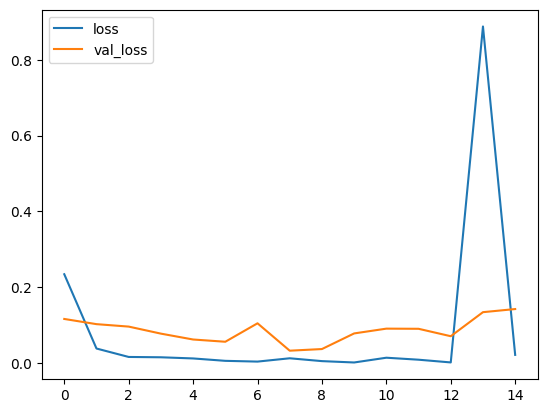

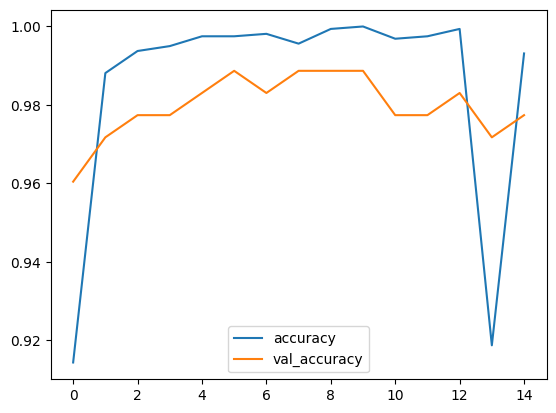

In [40]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

1/1 [==============================] - 0s 244ms/step
[[1.]]
Predicted Class: Other


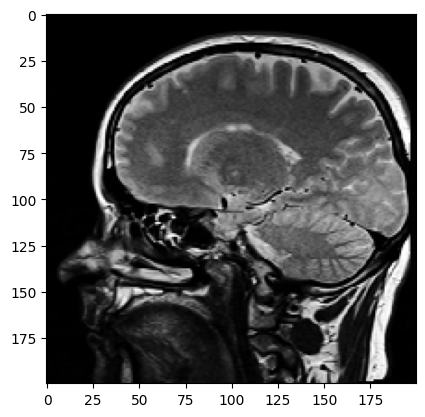

In [47]:
from keras.preprocessing import image

test_image = image.load_img('/content/drive/MyDrive/FYP/xray_recog/brain-1.jpg',target_size=(200,200))
#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = test_image / 255.0
test_image = np.expand_dims(test_image,axis=0)


# Result array
result = binary_classification_model.predict(test_image)

print(result)
if result[0][0] >= 0.5:
    print("Predicted Class: Other")
else:
    print("Predicted Class: Lung")

In [48]:
binary_classification_model.save('/content/drive/MyDrive/FYP/xray_recog/xray_model_v2.h5')